In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Charger l'ensemble de données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def preprocessing_function(x, y,num_classes):
    """Normalise les pixels entre 0 et 1 et convertit les étiquettes en int64."""
    x = tf.image.convert_image_dtype(x, tf.float32)  # Équivaut à x / 255.0
    y = tf.one_hot(y, num_classes)  # Conversion en one-hot
    
    return x, y

#La fonction tf.one_hot(y, num_classes) transforme les étiquettes en vecteurs one-hot.

# Appliquer le prétraitement sur les données d'entraînement et de test
num_classes = 10
x_train, y_train = preprocessing_function(x_train, y_train, num_classes)
x_test, y_test = preprocessing_function(x_test, y_test, num_classes)

# Diviser en ensembles d'entraînement et de test (80% train, 20% test)
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# Vérification des nouvelles formes


print(f"x_train shape après normalisation: {x_train.shape}")
print(f"y_train shape après one-hot encoding: {y_train.shape}")


# Conversion en tensors si nécessaire pour TensorFlow
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

x_train shape après normalisation: (60000, 28, 28)
y_train shape après one-hot encoding: (60000, 10)


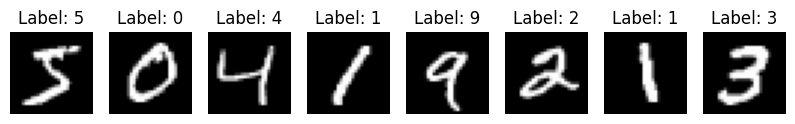

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Afficher quelques exemples d'images et leurs étiquettes correspondantes
def plot_images(x, y, num_examples=8):
    """Affiche les images avec leurs étiquettes correspondant aux données d'entrée."""
    plt.figure(figsize=(10, 5))
    
    for i in range(num_examples):
        plt.subplot(1, num_examples, i+1)  # Placer les images dans un grid
        plt.imshow(x[i], cmap='gray')  # Afficher l'image en niveaux de gris
        plt.title(f"Label: {np.argmax(y[i])}")  # Afficher l'étiquette en one-hot
        plt.axis('off')  # Masquer les axes
    
    plt.show()

# Affichage des 5 premières images d'entraînement avec leurs étiquettes
plot_images(x_train, y_train, num_examples=8)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Définir le modèle séquentiel
model = models.Sequential()

# Aplatir les images d'entrée 28x28 en un seul vecteur de 784 dimensionsle nombre total de pixels
model.add(layers.Flatten(input_shape=(28, 28)))

# Ajouter la première couche cachée avec 128 neurones et activation ReLU
model.add(layers.Dense(128, activation='relu'))
#(ici une image de 28x28 pixels) et de la complexité des données.
#  Une valeur comme 128 permet un bon compromis entre capacité d'apprentissage et complexité de calcul

# Ajouter la deuxième couche cachée avec 64 neurones et activation ReLU
model.add(layers.Dense(64, activation='relu'))

# Ajouter la couche de sortie avec 10 neurones (une par classe) et activation softmax
model.add(layers.Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Entraîner le modèle pour 10 époques
history = model.fit(x_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2416 - accuracy: 0.9293 - val_loss: 0.1209 - val_accuracy: 0.9632
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1022 - accuracy: 0.9694 - val_loss: 0.0969 - val_accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0816 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.0841 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0856 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0806 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.1006 - val_accuracy:

In [35]:
# Évaluer les performances sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy * 100:.2f}%")


313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9790
Précision sur l'ensemble de test : 97.90%


313/313 [==============================] - 1s 2ms/step


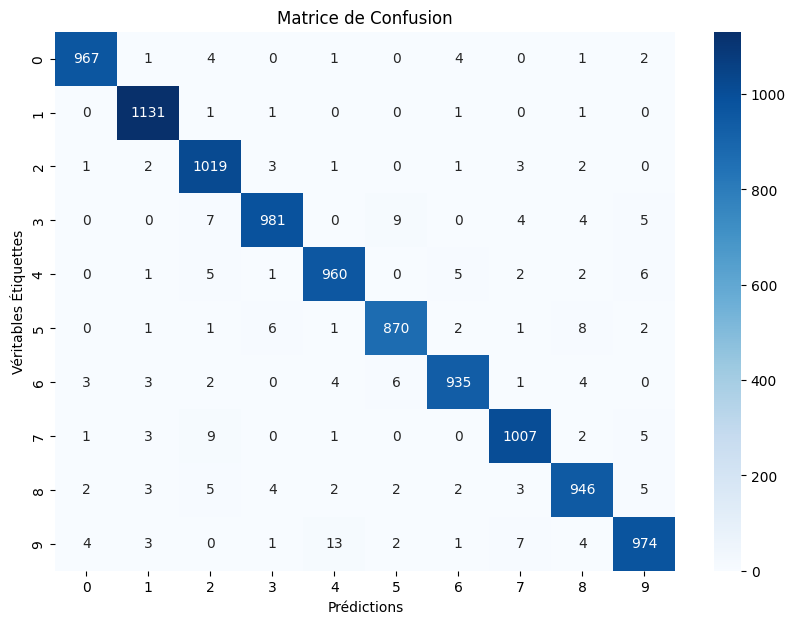

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédire les étiquettes des données de test
y_pred = model.predict(x_test)
#récupère l’indice de la plus grande valeur dans chaque ligne
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir les probabilités en classes

# Calculer la matrice de confusion
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)#Convertir les étiquettes en indices de classes.

# Tracer la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
# Affiche la matrice de confusion sous forme de carte de chaleur (heatmap)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables Étiquettes')
plt.show()
